In [1]:
import pandas as pd
import seaborn as sns
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt


In [2]:
config = {
  'host':'elecsimresults.mysql.database.azure.com',
  'user':'alexkell@elecsimresults',
  'password':'b3rz0s4m4dr1dth3h01113s!',
  'database':'elecsim',
  'ssl_ca':'/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/database/BaltimoreCyberTrustRoot.crt.pem'
}

conn = mysql.connector.connect(**config)

In [3]:
electricity_mix = pd.read_csv("/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/elecsim/data/processed/electricity_mix/energy_mix_historical.csv")



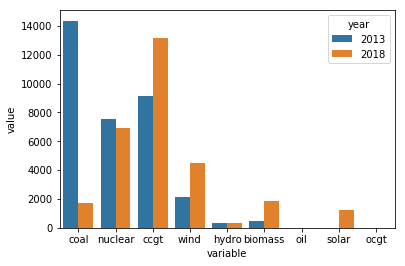

In [4]:
electricity_mix_2013_18 = electricity_mix[electricity_mix.year.isin([2013, 2018])]
sns.barplot(data=electricity_mix_2013_18, x='variable', hue='year', y='value')

In [5]:
actual_mix_2018 = electricity_mix[electricity_mix.year == 2018]
actual_mix_2018

,Unnamed: 0,year,variable,value
7,7,2018,coal,1753.406904
16,16,2018,nuclear,6924.267173
25,25,2018,ccgt,13180.123033
34,34,2018,wind,4500.075723
43,43,2018,hydro,365.992504
52,52,2018,biomass,1839.515745
61,61,2018,oil,0.004401
70,70,2018,solar,1244.565825
79,79,2018,ocgt,2.096373


In [6]:
# ga_results = pd.read_sql('SELECT * FROM validoptimresults', con=conn)
ga_results = pd.read_sql('SELECT * FROM validoptimresults', con=conn)

ga_results.to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/data/run_2.csv')
ga_results

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m,individual_c,coal,nuclear,ccgt,wind,solar
0,1,1,2111.385470,1.565273e+09,1.565275e+09,0.396730,0.001907,-14.258184,4343.016864,5830.174285,6395.021288,3641.589037,232.993598
1,2,1,3353.283670,1.565273e+09,1.565277e+09,0.648713,0.002979,38.209608,4878.764124,5546.931721,3921.669726,6374.973644,232.158495
2,3,1,718.301090,1.565273e+09,1.565274e+09,0.203053,0.002453,-16.844368,7161.228846,6309.177036,5276.765260,1163.954261,0.000000
3,4,1,3597.326466,1.565273e+09,1.565277e+09,0.560658,0.000514,92.265319,4502.622405,5426.791625,3713.736877,7105.475803,78.499635
4,5,1,3641.724220,1.565273e+09,1.565277e+09,0.629886,0.003976,62.773835,5492.718764,5625.752909,3624.594493,5832.858543,512.052902
5,6,1,873.760348,1.565273e+09,1.565274e+09,0.443725,0.001226,1.343717,7604.411047,6315.318040,4893.114411,1151.630587,0.000000
6,7,1,756.338509,1.565273e+09,1.565274e+09,0.491535,0.000334,49.738625,6130.190403,6309.177036,6157.445205,1163.954261,0.000000
7,8,1,3585.548403,1.565273e+09,1.565277e+09,0.405852,0.003985,-13.200040,4617.754709,5539.755717,4131.275507,6124.777721,418.386353
8,9,1,3450.294746,1.565273e+09,1.565277e+09,0.724292,0.000319,37.323674,4989.477401,5452.084011,3248.720384,6717.235342,415.045943
9,10,1,1475.836801,1.565273e+09,1.565275e+09,0.681012,0.001054,56.005445,4835.633863,5770.132552,5579.601699,4357.463668,75.159225


In [41]:
ga_results[['id', 'run_number', 'time_taken', 'reward', 'individual_m', 'individual_c']].to_csv('/Users/b1017579/Documents/PhD/Projects/10. ELECSIM/run/validation-optimisation/data/elecsim-ga-results.csv')

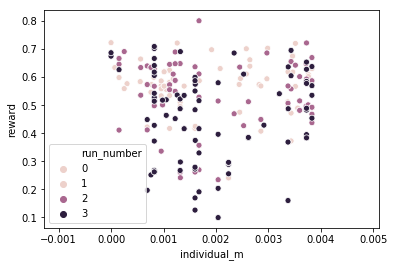

In [150]:
sns.scatterplot(data=ga_results, x='individual_m', y='reward', hue="run_number")

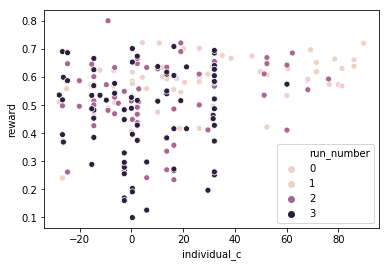

In [151]:
sns.scatterplot(data=ga_results, x='individual_c', y='reward', hue='run_number')

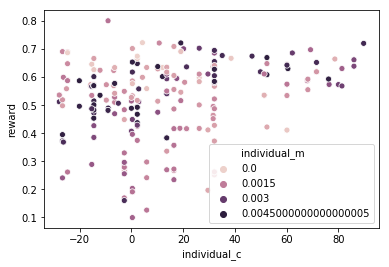

In [152]:
sns.scatterplot(data=ga_results, x='individual_c', y='reward', hue='individual_m')

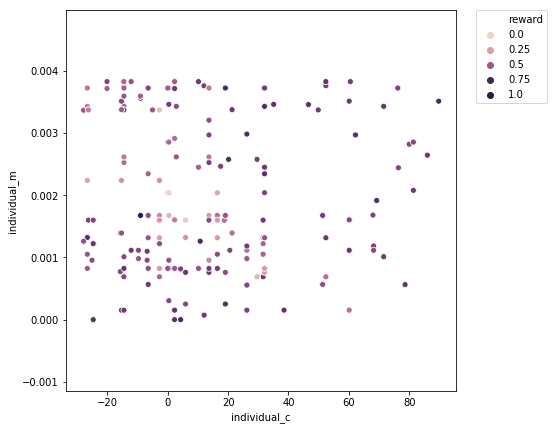

In [153]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=ga_results, x='individual_c', y='individual_m', hue='reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


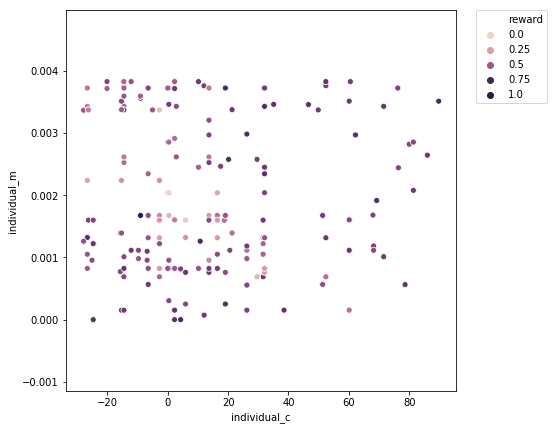

In [154]:
f, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(data=ga_results, x='individual_c', y='individual_m', hue='reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


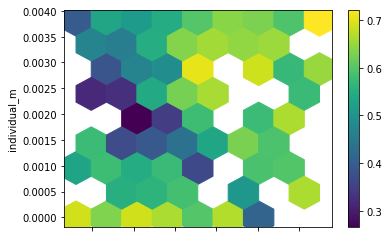

In [155]:
ga_results.plot.hexbin(x='individual_c', y='individual_m', C='reward', gridsize=8, cmap="viridis")

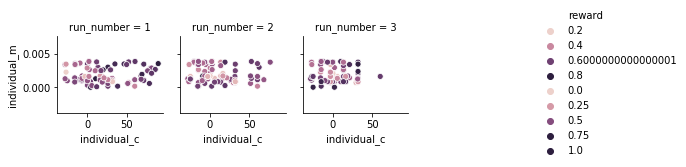

In [156]:
# sns.jointplot(data=ga_results, x='individual_c', y='individual_m', kind="kde")

# g = sns.FacetGrid(ga_results,col='run_number', palette="Set1")
# g = (g.map(sns.scatterplot, x='individual_c', y='individual_m', kind="kde"))
# g.add_legend()

g = sns.FacetGrid(ga_results, col="run_number", col_wrap=4, height=2)
g.map(sns.scatterplot, "individual_c", "individual_m", 'reward');
g.add_legend()

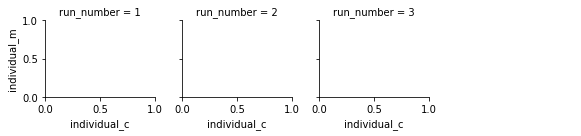

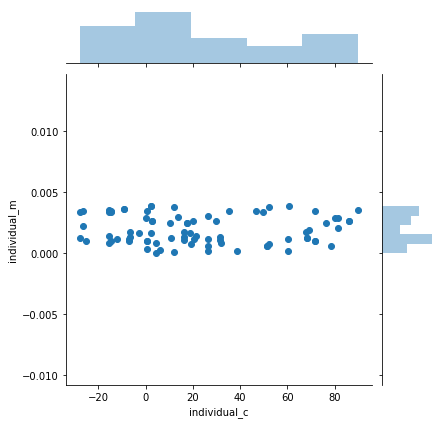

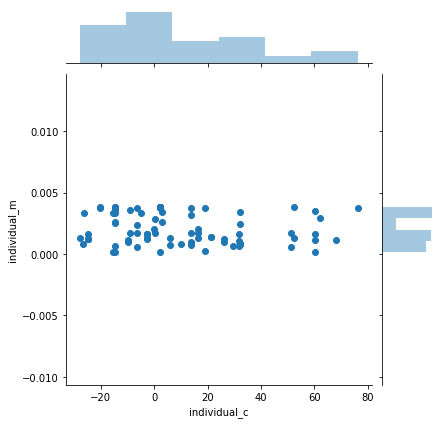

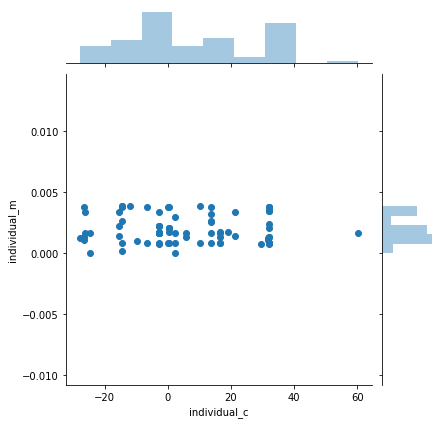

In [157]:
g = sns.FacetGrid(ga_results, col="run_number", col_wrap=4, height=2)
g.map(sns.jointplot, "individual_c", "individual_m");
g.add_legend()

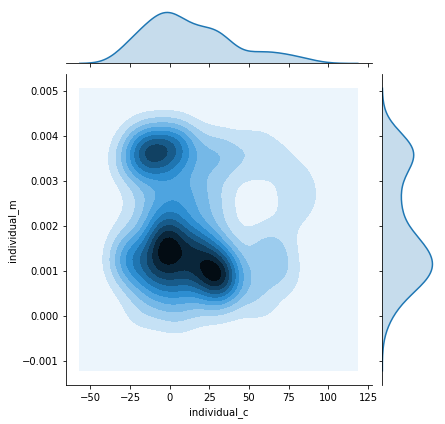

In [158]:
sns.jointplot(data=ga_results, x='individual_c', y='individual_m', kind="kde")

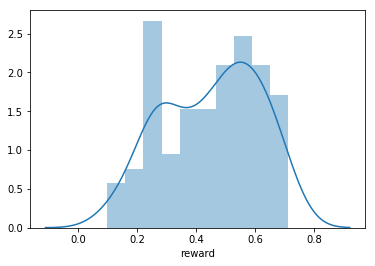

In [160]:
sns.distplot(ga_results[ga_results.run_number==3].reward, bins=10)

In [162]:
latest_run = ga_results[ga_results.run_number==3]

In [53]:
latest_run[(latest_run.individual_m>0.00196) & (latest_run.individual_m<0.00197) & (latest_run.individual_c>-28.763) & (latest_run.individual_c<-28.761) ]

,id,run_number,time_taken,reward,individual_m,individual_c,coal,nuclear,ccgt,wind,solar
554,555,10,11546.120260,0.404693,0.001962,-28.761021,3445.918315,5912.212810,9021.224740,3539.951191,67.643303
564,565,10,7847.109541,0.494003,0.001962,-28.761021,5788.658535,6107.209285,7794.899479,1836.911445,327.360180
572,573,10,9833.482635,0.524436,0.001962,-28.761021,4893.103353,5880.975987,10126.931452,4024.288261,75.159225


No handles with labels found to put in legend.


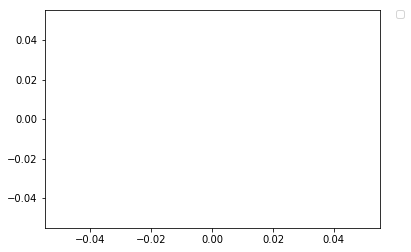

In [163]:
latest_run = ga_results[ga_results.run_number==9]
sns.scatterplot(data=latest_run, x='individual_c', y='individual_m', hue='reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


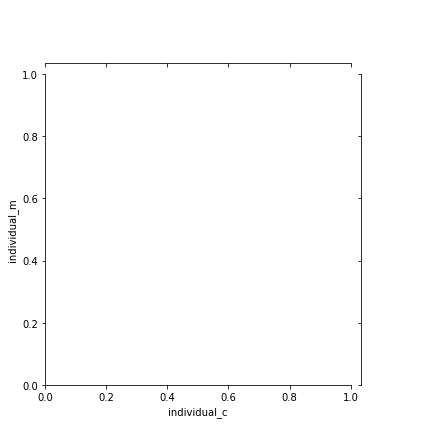

In [164]:
sns.jointplot(data=latest_run, x='individual_c', y='individual_m', kind="kde")

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


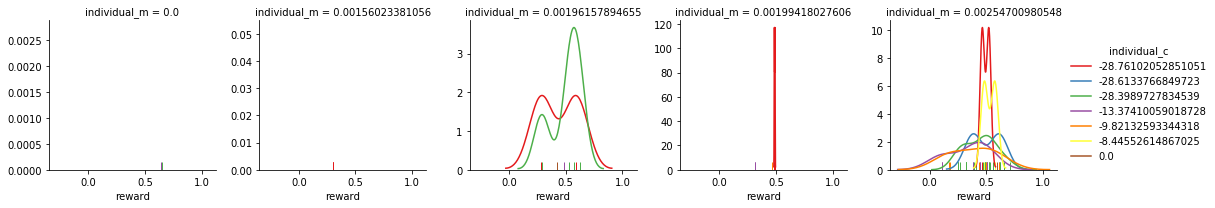

In [56]:

g = sns.FacetGrid(latest_run, col='individual_m', hue="individual_c", palette="Set1", sharey=False)
g = (g.map(sns.distplot, "reward", hist=False, rug=True))
g.add_legend()


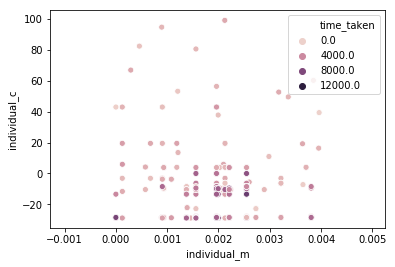

In [57]:
sns.scatterplot(data=ga_results, x='individual_m', y='individual_c', hue='time_taken')


In [173]:
ga_results.sort_values(['reward'])

,id,run_number,time_taken,timestamp_start,timestamp_end,reward,individual_m,individual_c,coal,nuclear,ccgt,wind,solar
271,272,4,8670.911587,1000000.0,1000000.0,0.099170,0.002041,0.366995,4893.328809,5486.049618,3630.059753,6597.571787,280.594440
322,323,4,4650.073293,1000000.0,1000000.0,0.099170,0.002041,0.366995,4929.200942,5657.734429,4388.519589,5163.025394,13.361640
226,227,3,1408.206532,1000000.0,1000000.0,0.099170,0.002041,0.366995,6362.204763,6304.842319,6000.649068,1166.495626,0.000000
205,206,3,3650.416421,1000000.0,1000000.0,0.125914,0.001600,5.906570,3856.633453,6245.661235,36602.053562,1214.627021,190.403370
216,217,3,5001.885540,1000000.0,1000000.0,0.160012,0.003372,-2.751431,4268.666521,5437.261119,4039.927890,6638.437790,151.153553
198,199,3,5609.091746,1000000.0,1000000.0,0.169402,0.001600,-2.751431,2039.718135,5685.346226,11942.976113,5091.139257,108.563325
335,336,4,3033.741216,1000000.0,1000000.0,0.169402,0.001600,-2.751431,6400.300330,6204.005069,5591.536959,1620.611604,8.351025
342,343,4,3402.822673,1000000.0,1000000.0,0.178354,0.000824,32.080048,5393.064412,6147.758590,6689.600849,1581.176105,283.934850
300,301,4,7342.382736,1000000.0,1000000.0,0.184804,0.001600,5.906570,4323.774510,5534.578189,4386.424986,6209.831557,251.365853
117,118,2,7103.296820,1000000.0,1000000.0,0.191100,0.001676,0.366995,4538.820277,5725.611958,5192.553233,5745.030368,201.259703


In [59]:
ga_results_long = pd.melt(ga_results, id_vars=['id', 'run_number', 'time_taken', 'individual_m', 'individual_c'], value_vars=['reward', 'coal','nuclear','ccgt','wind','solar'])
ga_results_long.head()

,id,run_number,time_taken,individual_m,individual_c,variable,value
0,1,1,2481.012779,0.003638,19.195056,reward,0.669790
1,2,1,2350.575709,0.002599,-5.522527,reward,0.690990
2,3,1,2017.028247,0.003953,16.377296,reward,0.660449
3,4,1,1235.670654,0.000458,82.267676,reward,0.700546
4,5,1,580.215830,0.002547,0.000000,reward,0.607848


In [60]:
best_result = ga_results.iloc[ga_results['reward'].argmin()]
# best_result = ga_results.iloc[134]
best_result

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.


id               469.000000
run_number         9.000000
time_taken      6693.156107
reward             0.110661
individual_m       0.002547
individual_c     -13.374101
coal            5519.917580
nuclear         6159.168336
ccgt            6738.282630
wind            1581.947240
solar            333.205898
Name: 468, dtype: float64

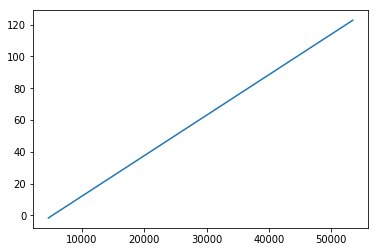

In [142]:
X_line = np.array(np.arange(4636.765716,53469.780720, 100))
Y_line = X_line * best_result.individual_m + best_result.individual_c

sns.lineplot(X_line, Y_line)

In [62]:
actual_mix_2018['data_type'] = 'actual'
# actual_mix_2018 = actual_mix_2018.rename(columns={'value': 'value-actual'})
actual_mix_2018

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,year,variable,value,data_type
7,7,2018,coal,1753.406904,actual
16,16,2018,nuclear,6924.267173,actual
25,25,2018,ccgt,13180.123033,actual
34,34,2018,wind,4500.075723,actual
43,43,2018,hydro,365.992504,actual
52,52,2018,biomass,1839.515745,actual
61,61,2018,oil,0.004401,actual
70,70,2018,solar,1244.565825,actual
79,79,2018,ocgt,2.096373,actual


In [63]:
best_result_df = best_result.to_frame().reset_index()
best_result_df.columns = ['variable','value']
best_result_df['data_type'] = 'predicted'
best_result_df

,variable,value,data_type
0,id,469.000000,predicted
1,run_number,9.000000,predicted
2,time_taken,6693.156107,predicted
3,reward,0.110661,predicted
4,individual_m,0.002547,predicted
5,individual_c,-13.374101,predicted
6,coal,5519.917580,predicted
7,nuclear,6159.168336,predicted
8,ccgt,6738.282630,predicted
9,wind,1581.947240,predicted


In [64]:
comparison = actual_mix_2018.merge(best_result_df, on=['variable'])
comparison

,Unnamed: 0,year,variable,value_x,data_type_x,value_y,data_type_y
0,7,2018,coal,1753.406904,actual,5519.917580,predicted
1,16,2018,nuclear,6924.267173,actual,6159.168336,predicted
2,25,2018,ccgt,13180.123033,actual,6738.282630,predicted
3,34,2018,wind,4500.075723,actual,1581.947240,predicted
4,70,2018,solar,1244.565825,actual,333.205898,predicted


In [65]:
comparison['value_actual_perc'] = comparison['value_x']/comparison['value_x'].sum()
comparison['value_pred_perc'] = comparison['value_y']/comparison['value_y'].sum()
(comparison.value_actual_perc-comparison.value_pred_perc).abs().sum()

0.5200469998181255

In [66]:
best_actual = actual_mix_2018[['variable', 'value', 'data_type']].append(best_result_df)
best_actual

,variable,value,data_type
7,coal,1753.406904,actual
16,nuclear,6924.267173,actual
25,ccgt,13180.123033,actual
34,wind,4500.075723,actual
43,hydro,365.992504,actual
52,biomass,1839.515745,actual
61,oil,0.004401,actual
70,solar,1244.565825,actual
79,ocgt,2.096373,actual
0,id,469.000000,predicted


In [67]:
best_actual_res = best_actual[best_actual['variable'].isin(['ccgt','nuclear','wind','solar','coal'])]
best_actual_res

,variable,value,data_type
7,coal,1753.406904,actual
16,nuclear,6924.267173,actual
25,ccgt,13180.123033,actual
34,wind,4500.075723,actual
70,solar,1244.565825,actual
6,coal,5519.917580,predicted
7,nuclear,6159.168336,predicted
8,ccgt,6738.282630,predicted
9,wind,1581.947240,predicted
10,solar,333.205898,predicted


In [68]:
best_actual_res['mix_perc'] = best_actual_res.groupby("data_type")['value'].apply(lambda x: x/x.sum())
best_actual_res

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,variable,value,data_type,mix_perc
7,coal,1753.406904,actual,0.063524
16,nuclear,6924.267173,actual,0.250857
25,ccgt,13180.123033,actual,0.477498
34,wind,4500.075723,actual,0.163032
70,solar,1244.565825,actual,0.045089
6,coal,5519.917580,predicted,0.271482
7,nuclear,6159.168336,predicted,0.302922
8,ccgt,6738.282630,predicted,0.331404
9,wind,1581.947240,predicted,0.077804
10,solar,333.205898,predicted,0.016388


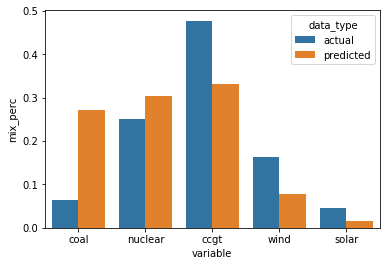

In [69]:
sns.barplot(data=best_actual_res, x='variable', y='mix_perc', hue='data_type')

In [139]:
len(X)

1000